# Python for Data Analysis using Pandas (part 1 of 2)

> The latest version of this notebook is always found at [github.com/tommyod/awesome-pandas](https://github.com/tommyod/awesome-pandas).   
  Improvements, corrections or suggestions? **Please submit a [Pull Request](https://github.com/tommyod/awesome-pandas/pulls).**
  
  ![](pandas_vs_excel_vs_sas.png)

# Table of contents

- **(1) Setup**
  - (1.1) Installing Python and packages
  - (1.2) Importing packages
- **(2) Importing data**
  - (2.1) Importing .csv files
  - (2.2) Other ways of creating DataFrames
  - (2.3) Changing names and data types
- **(3) Summarizing data**
  - (3.1) Peeking at the data
  - (3.2) Null values and summary statistics
  - (3.3) Unique values, value counts and sorting
  - (3.4) Basic visualizations
- **(4) Selecting and computing new columns**
  - (4.1) Accessing rows, columns and data
  - (4.2) Selecting subsets of columns
  - (4.3) Selecting subsets of rows
  - (4.4) Selecting subsets of rows *and* columns
  - (4.5) Creating new columns
  - (4.6) Applying functions
  
  
**In the next video:** filtering and sorting, split-apply-combine, plotting, time series, machine learning, ...

---------------------------------

# (1) Setup

## (1.1) Installing Python and packages

### Python and Anaconda

If you haven't done it yet, you need to install Python.
I recommend the [Anaconda Distribution](https://www.anaconda.com/download/), and you should install version `3.X`.
- If you're on Windows, you will get a program called *Anaconda Prompt*. Open in and run `conda --version` to verify that everything works.
- If you're on Linux, open a terminal and run `conda --version`.

Type `conda list` to see every installed package, and `conda update --all` to update every package. Type `python` to open an interactive Python terminal, and `exit()` to leave.

### NumPy, matplotlib and Pandas

![](https://indranilsinharoy.files.wordpress.com/2013/01/scientificpythonecosystemsi.png?w=584&h=442)

*Image source: https://indranilsinharoy.com/2013/01/06/python-for-scientific-computing-a-collection-of-resources/*

To install indiviual packages, run `conda install <package>`.   
The Anaconda distribution comes with 3 packages which this tutorial requires, namely [pandas](https://pandas.pydata.org/), [NumPy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/).
We'll also briefly use [sklearn](https://scikit-learn.org/stable/).

- **NumPy** implements $n$-dimensional arrays in Python for efficient numerical computations. See the [arXiv](https://arxiv.org/pdf/1102.1523.pdf) paper for a nice introduction. To learn basic NumPy, consider doing these [100 NumPy exercises](https://github.com/rougier/numpy-100). For an in-depth look at NumPy and vectorization to speed up scientific computing, see [From Python to Numpy
](https://www.labri.fr/perso/nrougier/from-python-to-numpy/).
- **Matplotlib** is the most popular library for plotting in Python. See the beautiful [gallery](https://matplotlib.org/gallery.html) to get an overview of the capabilities of matplotlib. Read the [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html) by Nicolas P. Rougier for an introduction.
- **Pandas** is a library for data analysis based on two objects, the [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

### Jupyter

A [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) is an environment for running Python code interactively, displaying graphs and working with data. Think of it as a tool with capabilities somewhere between a simple terminal and a full fledged IDE. Move to a directory using the `cd` command in the terminal, then run `jupyter notebook` to start up a notebook. A video introduction to JupyterLab is [JupyterLab: Building Blocks for Interactive Computing](https://www.youtube.com/watch?v=Ejh0ftSjk6g). See also this list of [28 Jupyter Notebook tips](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).

## (1.2) Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import KDEpy
import sklearn
%matplotlib inline

### Package versions

To make this Jupyter Notebook more easily reproducible, we list versions of the libraries we will be using.

In [2]:
import datetime

print('Today is', datetime.datetime.utcnow())
print('-'*2**6)

for lib in [pd, np, matplotlib, KDEpy, sklearn]:
    print(f'{lib.__name__.ljust(12)} version {lib.__version__}')

Today is 2019-03-04 21:37:07.208603
----------------------------------------------------------------
pandas       version 0.24.1
numpy        version 1.15.4
matplotlib   version 3.0.2
KDEpy        version 0.6.11
sklearn      version 0.20.1


### Using Jupyter Notebooks

- Useful shortcuts: `SHIFT + TAB`, `SHIFT + ENTER`, `ESC`, `ENTER`, `E`, `A`, `D,D`, `I, I`. Type `H` to see all shortcuts.
- Executing terminal commands from within the notebook using `!`.
- Using markdown and $\LaTeX{}$.
- Timing cells using `%%timeit` and other built-in magic commands.
- Pitfalls when using notebooks: state, order of execution, tidyness.

Example of $\LaTeX{}$ usage in notebooks:

$$0 \leq
  \left[\operatorname{tr}(\mathbf{A} \mathbf{B})\right]^2 \leq
  \operatorname{tr}\left(\mathbf{A}^2\right) \operatorname{tr}\left(\mathbf{B}^2\right) \leq
  \left[\operatorname{tr}(\mathbf{A})\right]^2 \left[\operatorname{tr}(\mathbf{B})\right]^2$$
$$\varphi_X(t) = \operatorname{E}\left[\exp \left ({i\int_\mathbf{R} t(s)X(s)ds} \right ) \right]$$

# (2) Importing data

Starting a cell with a `!` let's us use terminal commands. The UNIX `head` command shows the first rows of the file.

## (2.1) Importing `.csv` files

In [3]:
!tree . -L 2

.
├── data
│   ├── google_trends.csv
│   ├── movie_metadata.csv
│   ├── wine_data.csv
│   └── world_population_history.csv
├── Pandas_tutorial_part1.ipynb
├── Pandas_tutorial_part1.py
├── Pandas_tutorial_part2.ipynb
├── Pandas_tutorial_part2.py
├── pandas_vs_excel_vs_sas.png
└── Tutorial.py

1 directory, 10 files


In [4]:
!head data/movie_metadata.csv -n 2

> **Interested in learning UNIX commands?** The book [The Linux Command Line](https://www.amazon.com/Linux-Command-Line-Complete-Introduction-ebook/dp/B006X2QEQS) gives a detailed introduction, and [Data Science at the Command Line](https://www.amazon.com/Data-Science-Command-Line-Time-Tested/dp/1491947853) shows how basic data manipulation may be done using the command line only.

The file has many columns, so we'll only load a couple into a pandas DataFrame.
To familiarize ourselves with with [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), we'll use `%%time` to time the execution of the cell below.

In [5]:
%%time

cols_to_use = ['movie_title', 'director_name', 'country', 'content_rating', 'imdb_score', 'gross']
df = pd.read_csv(r'data/movie_metadata.csv', sep=',', usecols=cols_to_use)
print(f'Loaded data of size {df.shape} into memory.')

Loaded data of size (5043, 6) into memory.
CPU times: user 31.3 ms, sys: 3.91 ms, total: 35.2 ms
Wall time: 35.2 ms


In [6]:
df.head(2)  # Show the top 2 rows

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


The `df.shape` attribute gives the rows and columns of the DataFrame.

In [7]:
df.shape  # Alternatively, use len(df) for row count

(5043, 6)

## (2.2) Other ways of creating DataFrames

**The DataFrame**

> Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with **labeled axes** (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a **dict-like
container for Series objects**. The primary pandas data structure.

**Creating a DataFrame from scratch**

In [8]:
pd.DataFrame({'name':['Max', 'Mark', 'Mia'], 'age':[31, 25, 38]})

,name,age
0,Max,31
1,Mark,25
2,Mia,38


**Reading a HTML table from the web**

In [9]:
# Read HTML tables into a list of DataFrame objects.
url = r'https://en.wikipedia.org/wiki/List_of_Germans_by_net_worth'
tables = pd.read_html(url, header=0)

df_net_worth = tables[0]

# Asserts can be useful for sanity checks
assert len(df_net_worth) > 0 
assert df_net_worth.Name.is_unique


df_net_worth.head()

,World ranking,Name,Citizenship,Net worth (USD),Sources of wealth
0,21,Georg Schaeffler,Germany,26.9 billion,Schaeffler Group
1,37,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,21.3 billion,Aldi Süd
2,46,Dieter Schwarz,Germany,19.4 billion,Schwarz Gruppe
3,49,Theo Albrecht Jr.,Germany,19 billion,Aldi Nord and Trader Joe's
4,50,Michael Otto,Germany,18.1 billion,Otto Group


**Reading from databases is also possible.**

Reading from Microsoft SQL using `pyodbc` and `pd.read_sql(sql_code, connection)`.

---------

> **Gotcha.** Methods on DataFrames **return a new instance** by default. In other words, they behave like methods on *immutable* Python object, and not like methods on *mutable* objects.

In [10]:
# Lists are MUTABLE
scores = [6, 2, 4, 9, 1]
scores.sort()  # Changes the object in-place, returns None
print(scores)

# Strings are IMMUTABLE
my_name = 'tommy'
my_name = my_name.capitalize()  # A new instance is returned
print(my_name)

[1, 2, 4, 6, 9]
Tommy


## (2.3) Changing names and data types

In [11]:
# Alter axes labels
df_net_worth = (df_net_worth
                .rename(columns={'Net worth (USD)': 'net_worth',
                                'World ranking': 'world_ranking',
                                'Sources of wealth': 'wealth_source'}))

df.rename(columns=str.capitalize).head(2)

,Director_name,Gross,Movie_title,Country,Content_rating,Imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


The data type of each column may be listed using `df.dtypes`. Automatic conversion is possible via `pd.to_numeric` and `pd.to_datetime`.

In [12]:
df.dtypes

director_name      object
gross             float64
movie_title        object
country            object
content_rating     object
imdb_score        float64
dtype: object

In [13]:
df_net_worth['net_worth_num'] = (df_net_worth['net_worth']
                             .str.replace(' billion', '')
                             .apply(float))

df_net_worth.head(2)

,world_ranking,Name,Citizenship,net_worth,wealth_source,net_worth_num
0,21,Georg Schaeffler,Germany,26.9 billion,Schaeffler Group,26.9
1,37,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,21.3 billion,Aldi Süd,21.3


### Getting help

There are many ways to help help on objects and methods.

- Use `SHIFT TAB` in a notebook.
- Use question marks in the notebook, e.g. `?df.sum`.
- Use the built-in Python function `help`, e.g. `help(df.sum)`.

In [14]:
# df.sum?

# (3) Summarizing data

This section shows some important methods related to summarizing data.

## (3.1) Peeking at the data

Three methods that are useful when peeking at the data are `df.head`, `df.tail` and `df.sample`.
Head and tail are $\mathcal{O}(1)$ operations, while sample is $\mathcal{O}(n)$, where $n$ is the number of rows.
For small datasets, this makes no difference in practice. We'll use `df.sample` here.

In [15]:
# Return the first `n` rows.
df.head(n=2)  # df.tail(n=2) returns the last rows

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


In [16]:
df.sample(n=2, replace=False, weights=None, random_state=None)

,director_name,gross,movie_title,country,content_rating,imdb_score
2699,Mark Piznarski,10494147.0,Here on Earth,USA,PG-13,5.1
1558,David Cronenberg,31493782.0,A History of Violence,USA,R,7.5


## (3.2) Null values and summary statistics

We should make sure the data types are correct. To do so, we can use `df.dtypes`, or `df.info()` for some more information.

In [17]:
# Print a concise summary of a DataFrame
df.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
director_name     4939 non-null object
gross             4159 non-null float64
movie_title       5043 non-null object
country           5038 non-null object
content_rating    4740 non-null object
imdb_score        5043 non-null float64
dtypes: float64(2), object(4)
memory usage: 236.5+ KB


We have some null values. Let's count them by chaining `df.isnull()` and `df.sum()`.

In [18]:
# Detect missing values -> sum over rows
null_values = df.isnull().sum(axis=0)
null_values #  / len(df)

director_name     104
gross             884
movie_title         0
country             5
content_rating    303
imdb_score          0
dtype: int64

The result of the above is not a DataFrame object, but a Series.

In [19]:
type(null_values)

pandas.core.series.Series

![alt text](https://www.mathsisfun.com/algebra/images/scalar-vector-matrix.svg)
*Image source:* https://www.mathsisfun.com/algebra/scalar-vector-matrix.html


We can make the output prettier by converting the `null_values` Series to a DataFrame using the `to_frame()` method, then transposing using `.T`, and finally renaming the first index.

In [20]:
null_values.to_frame().T.rename(index={0: 'Missing values'})

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


The above is called *method chaining*, and can be written like so:

In [21]:
(df
    .isnull()    # Figure out whether every entry is null (missing), or not
    .sum(axis=0) # Sum over each column, axis=0 is the default
    .to_frame()  # The result is a Series, convert to DataFrame
    .T           # Transpose (switch rows and columns)
    .rename(index={0:'Missing values'}) # Rename the index and show it
)

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


A tour of summarization would not be complete without `df.describe()`.  
Calling `df.count()`, `df.nunique()`, `df.mean()`, `df.std()`, `df.min()`, `df.quantile()`, `df.max()` is also possible.

> **Gotcha.** There are 200+ methods defined on a DataFrame. See the [API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html) for an exhaustive list.

In [22]:
# dir(pd.DataFrame)

In [23]:
df.describe(percentiles=[0.5], include='all').fillna('')

,director_name,gross,movie_title,country,content_rating,imdb_score
count,4939,4159,5043,5038,4740,5043
unique,2398,,4917,65,18,
top,Steven Spielberg,,Pan,USA,R,
freq,26,,3,3807,2118,
mean,,4.84684e+07,,,,6.44214
std,,6.8453e+07,,,,1.12512
min,,162,,,,1.6
50%,,2.55175e+07,,,,6.6
max,,7.60506e+08,,,,9.5


In [24]:
df.shape

(5043, 6)

In [25]:
df.dropna(axis=0, how='any').shape

(4092, 6)

In [26]:
df.drop_duplicates(subset=None).shape  # Use df[df.duplicated()] to see rows

(4920, 6)

In [27]:
df = df.dropna(axis=0, how='any').drop_duplicates(subset=None)

## (3.3) Unique values, value counts and sorting

In [28]:
df.content_rating.unique()  # Not the same as: df.content_rating.is_unique

array(['PG-13', 'PG', 'G', 'R', 'Unrated', 'Approved', 'NC-17', 'X',
       'Not Rated', 'M', 'GP', 'Passed'], dtype=object)

In [29]:
print(df.content_rating.drop_duplicates().tolist())

['PG-13', 'PG', 'G', 'R', 'Unrated', 'Approved', 'NC-17', 'X', 'Not Rated', 'M', 'GP', 'Passed']


In [30]:
df.content_rating.value_counts()

R            1818
PG-13        1352
PG            596
G              95
Not Rated      56
Unrated        34
Approved       18
X               9
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [31]:
df[['movie_title', 'gross']].nlargest(3, 'gross')

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0


In [32]:
# Sort by country, then by IMDB_score. Put NA values last
df.sort_values(by=['country', 'imdb_score'], 
               ascending=[True, False], 
               na_position='last').head()

,director_name,gross,movie_title,country,content_rating,imdb_score
4735,Siddiq Barmak,1127331.0,Osama,Afghanistan,PG-13,7.4
4000,Juan José Campanella,20167424.0,The Secret in Their Eyes,Argentina,R,8.2
4415,Fabián Bielinsky,1221261.0,Nine Queens,Argentina,R,7.9
4450,Lucrecia Martel,304124.0,The Holy Girl,Argentina,R,6.7
1491,Hark Tsui,10076136.0,Knock Off,Aruba,R,4.8


## (3.4) Basic visualizations

Some quick visualizations.

In [33]:
df.corr(method='pearson')

,gross,imdb_score
gross,1.00000,0.20497
imdb_score,0.20497,1.00000


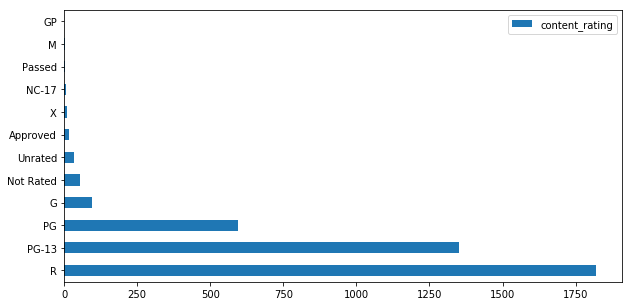

In [34]:
(df.content_rating
 .value_counts()
 .to_frame()  # Below are the default values, except `figsize`
 .plot.barh(subplots=False, sharex=None, sharey=False, layout=None, 
            figsize=(10, 5), use_index=True, title=None, grid=None, legend=True, 
            style=None, logx=False, logy=False, loglog=False, xticks=None, 
            yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, 
            colormap=None, table=False, yerr=None, xerr=None, 
            secondary_y=False, sort_columns=False));

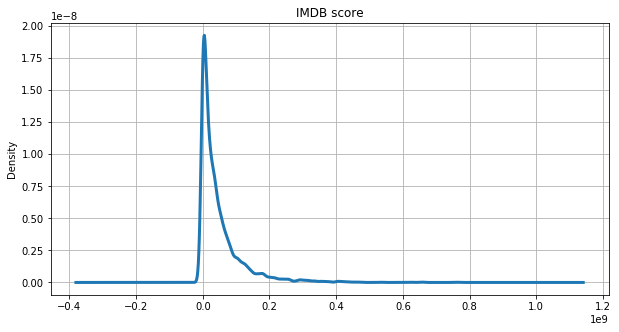

In [35]:
df.gross.plot.kde(bw_method=0.1, grid=True, title='IMDB score', lw=3, figsize=(10, 5));

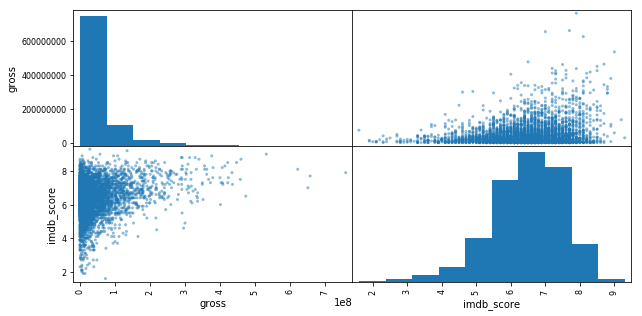

In [36]:
plot = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 5))

# (4) Selecting and computing new columns

This section is about selecting subsets of a datset, or creating new data from existing data, i.e.:

- Selecting a **single column**, or a **subset of columns**.
- Selecting a **subset of rows**, i.e. filtering.
- Chaining and/or combining the above operations to accomplish both.


## (4.1) Accessing index, columns and data

In [37]:
df.index

Int64Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
            ...
            5021, 5025, 5026, 5027, 5033, 5034, 5035, 5037, 5041, 5042],
           dtype='int64', length=3990)

In [38]:
df.columns

Index(['director_name', 'gross', 'movie_title', 'country', 'content_rating',
       'imdb_score'],
      dtype='object')

In [39]:
# This is very useful when using data with libraries
df.to_numpy()

array([['James Cameron', 760505847.0, 'Avatar\xa0', 'USA', 'PG-13', 7.9],
       ['Gore Verbinski', 309404152.0,
        "Pirates of the Caribbean: At World's End\xa0", 'USA', 'PG-13',
        7.1],
       ['Sam Mendes', 200074175.0, 'Spectre\xa0', 'UK', 'PG-13', 6.8],
       ...,
       ['Edward Burns', 4584.0, 'Newlyweds\xa0', 'USA', 'Not Rated', 6.4],
       ['Daniel Hsia', 10443.0, 'Shanghai Calling\xa0', 'USA', 'PG-13',
        6.3],
       ['Jon Gunn', 85222.0, 'My Date with Drew\xa0', 'USA', 'PG', 6.6]],
      dtype=object)

In [40]:
df.gross.dropna().to_numpy()

array([7.60505847e+08, 3.09404152e+08, 2.00074175e+08, ...,
       4.58400000e+03, 1.04430000e+04, 8.52220000e+04])

## (4.2) Selecting subsets of columns

In [41]:
print(df.columns.tolist())  # Get the columns

['director_name', 'gross', 'movie_title', 'country', 'content_rating', 'imdb_score']


In [42]:
df.director_name.head(3)  # Alternatively, use df['director_name'].head(3)

0     James Cameron
1    Gore Verbinski
2        Sam Mendes
Name: director_name, dtype: object

Selecting two or more columns.

In [43]:
df[['movie_title', 'country']].head(2)

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA


The most useful selection function is `df.loc[[row1, row2, ...], [col1, col2, ...]]`.

- `df.loc[:, [col1, col2]]` selects every row, and columns `[col1, col2]`
- `df.loc[[row1, row2], :]` selects rows `[row1, row2]`, and every column

In [44]:
df.loc[:, ['movie_title', 'country']].head(2)

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA


In [45]:
a = df.loc[:, 'gross']  # Returns a Series
b = df.loc[:, ['gross']]  # Returns a DataFrame

print(type(a))
print(type(b))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Instead of selecting a subset of columns to *keep*, we can select a subset to *drop*.

In [46]:
# Drop specified labels from rows or columns
df.drop(columns=['director_name', 'gross', 'movie_title']).head(3)

,country,content_rating,imdb_score
0,USA,PG-13,7.9
1,USA,PG-13,7.1
2,UK,PG-13,6.8


In [47]:
# Integer-location based indexing
df.iloc[1:3, [0, 1, 2]]

,director_name,gross,movie_title
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End
2,Sam Mendes,200074175.0,Spectre


## (4.3) Selecting subsets of rows

In [48]:
# Return the first `n` rows
df.head(n=1)

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [49]:
# Access a group of rows and columns by label(s) or a boolean array
df.loc[[0], :]

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [50]:
df.loc[[0]]

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [51]:
# Top three movies / TV-series not from the USA
df[df.country != 'USA'].nlargest(3, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
4498,Sergio Leone,6100000.0,"The Good, the Bad and the Ugly",Italy,Approved,8.9
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
4029,Fernando Meirelles,7563397.0,City of God,Brazil,R,8.7


In [52]:
# Best non-American films, with content rating PG-13
mask = (df.country != 'USA') & (df.content_rating == 'PG-13')
df[mask].nlargest(3, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
2323,Hayao Miyazaki,2298191.0,Princess Mononoke,Japan,PG-13,8.4
4659,Asghar Farhadi,7098492.0,A Separation,Iran,PG-13,8.4


## (4.4) Selecting subsets of rows *and* columns

In [53]:
# Above average movies, with the title containing 'ring'
row_mask = ((df.imdb_score > df.imdb_score.mean()) & 
             df.movie_title.str.contains('ring'))
df.loc[row_mask, ['director_name', 'movie_title', 'country']]

,director_name,movie_title,country
1196,James Wan,The Conjuring 2,USA
1562,Martin Scorsese,Bringing Out the Dead,USA
2163,James Wan,The Conjuring,USA
2969,Peter Webber,Girl with a Pearl Earring,UK
3858,Todd Solondz,Life During Wartime,USA
4298,Lance Mungia,Six-String Samurai,USA


In [54]:
# Columns containing and underscore
cols = [c for c in df.columns if '_' in c]
df.loc[:, cols].head()

,director_name,movie_title,content_rating,imdb_score
0,James Cameron,Avatar,PG-13,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,PG-13,7.1
2,Sam Mendes,Spectre,PG-13,6.8
3,Christopher Nolan,The Dark Knight Rises,PG-13,8.5
5,Andrew Stanton,John Carter,PG-13,6.6


In [55]:
# Numerical columns
numeric_cols = df.dtypes[df.dtypes == np.float].index.tolist()
df.loc[:, numeric_cols].head(n=2)

,gross,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1


## (4.5) Creating new columns

In [56]:
temp = df.copy()  # Copy the DataFrame

# Create a new column - based on the gross income
temp['log_gross'] = temp['gross'].apply(np.log10)

temp.head(2)

,director_name,gross,movie_title,country,content_rating,imdb_score,log_gross
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9,8.881103
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1,8.490526


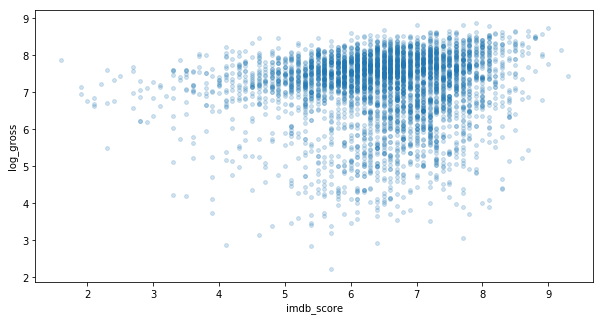

In [57]:
temp.plot.scatter(x='imdb_score', y='log_gross', alpha=0.2, s=15, figsize=(10, 5));

In [58]:
# Assign new columns to a DataFrame, returning a new object
# (a copy) with the new columns added to the original ones.
(temp.assign(log_gross=lambda df:df.gross.apply(np.log10))).head()

# One advantage is that method chaining can be used
(temp
     .assign(log_gross=lambda df:df.gross.apply(np.log10)) # Create a new column
     .loc[:, ['country', 'content_rating', 'log_gross']] # Filter
     .groupby(['country', 'content_rating']) # Group by and mean
     .mean()
     .reset_index() # Reset the index to sort
     .sort_values(['country', 'log_gross'], ascending=[True, False]) # Sort the results
     .set_index(['country', 'content_rating']) # Re-index
     .assign(log_gross=lambda df:df.log_gross.round(2)) # Re-define the column and round it
     .head(5)
)

log_gross
country     content_rating           
Afghanistan PG-13                6.05
Argentina   R                    6.29
Aruba       R                    7.00
Australia   G                    7.54
            PG-13                7.32

## (4.6) Applying functions

On a `pd.Series`:

- `pd.Series.map` applies an elementwise $f: \mathbb{R} \to \mathbb{R}$ function (e.g. `str`, or `float`)
- `pd.Series.apply` applies a vectorized $f: \mathbb{R}^n \to \mathbb{R}^n$ function  (e.g. `log`, or `sin`)
- `pd.Series.aggregate` applies an aggreation $f: \mathbb{R}^n \to \mathbb{R}$ function  (e.g. `mean`, or `std`)

On a `pd.DataFrame`:

- `pd.DataFrame.applymap` applies an elementwise $f: \mathbb{R} \to \mathbb{R}$ function to every element
- `pd.DataFrame.apply` applies a vectorized $f: \mathbb{R}^n \to \mathbb{R}^n$ function to every element
- `pd.DataFrame.aggregate` applies an aggreation $f: \mathbb{R}^n \to \mathbb{R}$ function over an axis

### Functions on Series

In [59]:
# Map values of Series using input correspondence (a dict, Series, or function).
df.gross.map(float).head(2)

0    760505847.0
1    309404152.0
Name: gross, dtype: float64

In [60]:
# Dictionaries are also maps, but brittle since no keys maps to NaN
(df.content_rating
    .map({'PG-13':'inappropriate for children under 13', 
          'PG': 'may not be suitable for children'}, na_action='ignore')
    .value_counts(dropna=False)
    .to_frame())

,content_rating
NaN,2042
inappropriate for children under 13,1352
may not be suitable for children,596


The `df.apply` method applies a NumPy [ufunc](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

> A *universal function* (or ufunc for short) is a function that operates on ndarrays in an **element-by-element** fashion.

In [61]:
# Invoke function on values of Series. Can be ufunc (a NumPy function
# that applies to the entire Series) or a Python function that only works
# on single values
df.gross.apply(np.log10).head(2)

0    8.881103
1    8.490526
Name: gross, dtype: float64

In [62]:
# Aggregate using one or more operations over the specified axis.
df.gross.aggregate(np.mean, axis=0)

48392390.917042606

---------------

### Functions on DataFrames

In [63]:
df.loc[:, ['gross', 'imdb_score']].apply(np.log).head(2)

,gross,imdb_score
0,20.449494,2.066863
1,19.550159,1.960095


In [64]:
df.loc[:, ['gross', 'imdb_score']].applymap(int).head(2)

,gross,imdb_score
0,760505847,7
1,309404152,7


In [65]:
df.loc[:, ['gross', 'imdb_score']].mean().head(2)

gross         4.839239e+07
imdb_score    6.463283e+00
dtype: float64

In [66]:
# Or specify your own aggregation function
def spread(array):
    return np.max(array) - np.min(array)

df.loc[:, ['gross', 'imdb_score']].aggregate(spread, axis=0)

gross         760505685.0
imdb_score            7.7
dtype: float64

## Next up ...

**In the next video:** filtering and sorting, split-apply-combine, plotting, time series, machine learning, ...